In [223]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [228]:
# Loading Data Columns
df = pd.read_csv("Good_bad.csv")
columns = ['Donation_Date','Sum(Good)','Sum(Bad)']
Donations = df[columns]

In [229]:
Donations = Donations.sort_values('Donation_Date')

# Grouping Date Column With sum of Bad and good samples

In [230]:
# Groupby dates
Donations = Donations.groupby('Donation_Date')['Sum(Bad)','Sum(Good)'].sum().reset_index()

In [236]:
# Set index for donation date
Donations = Donations.set_index('Donation_Date')
Donations.index

Index(['01-Apr-2014', '01-Apr-2015', '01-Apr-2016', '01-Apr-2017',
       '01-Apr-2018', '01-Aug-2013', '01-Aug-2014', '01-Aug-2015',
       '01-Aug-2016', '01-Aug-2017',
       ...
       '31-May-2014', '31-May-2015', '31-May-2016', '31-May-2017',
       '31-May-2018', '31-Oct-2013', '31-Oct-2014', '31-Oct-2015',
       '31-Oct-2016', '31-Oct-2017'],
      dtype='object', name='Donation_Date', length=1867)

# Taking features of bad and good and put them in Y so it is easy to plot 

In [237]:
y = Donations
y

,Sum(Bad),Sum(Good)
Donation_Date,,
01-Apr-2014,3,147
01-Apr-2015,4,126
01-Apr-2016,2,81
01-Apr-2017,4,126
01-Apr-2018,2,48
01-Aug-2013,11,135
01-Aug-2014,3,112
01-Aug-2015,6,104
01-Aug-2016,2,138


In [174]:
y['2013':]

,Sum(Bad),Sum(Good)
Donation_Date,,
21-Apr-2014,8,140
21-Apr-2015,9,150
21-Apr-2016,2,163
21-Apr-2017,1,119
21-Apr-2018,4,86
21-Aug-2013,16,228
21-Aug-2014,4,133
21-Aug-2015,3,120
21-Aug-2016,8,185


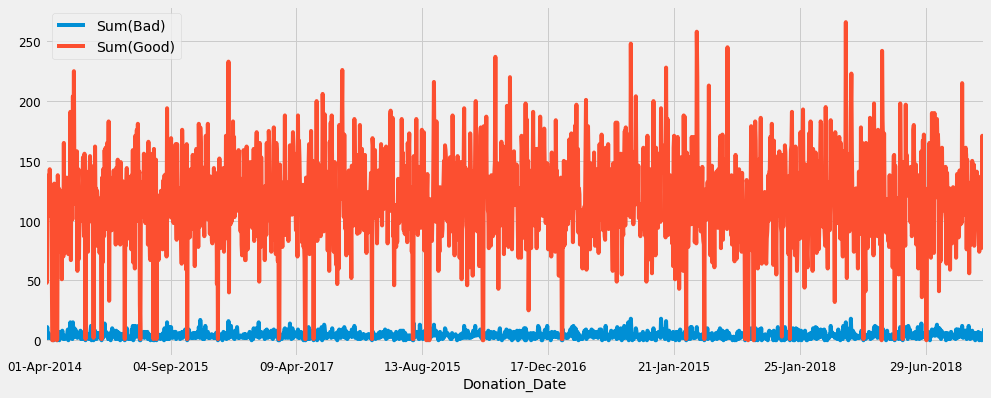

In [238]:
# Plot of BAD and Good Samples after groupby
y.plot(figsize=(15, 6))
plt.show()

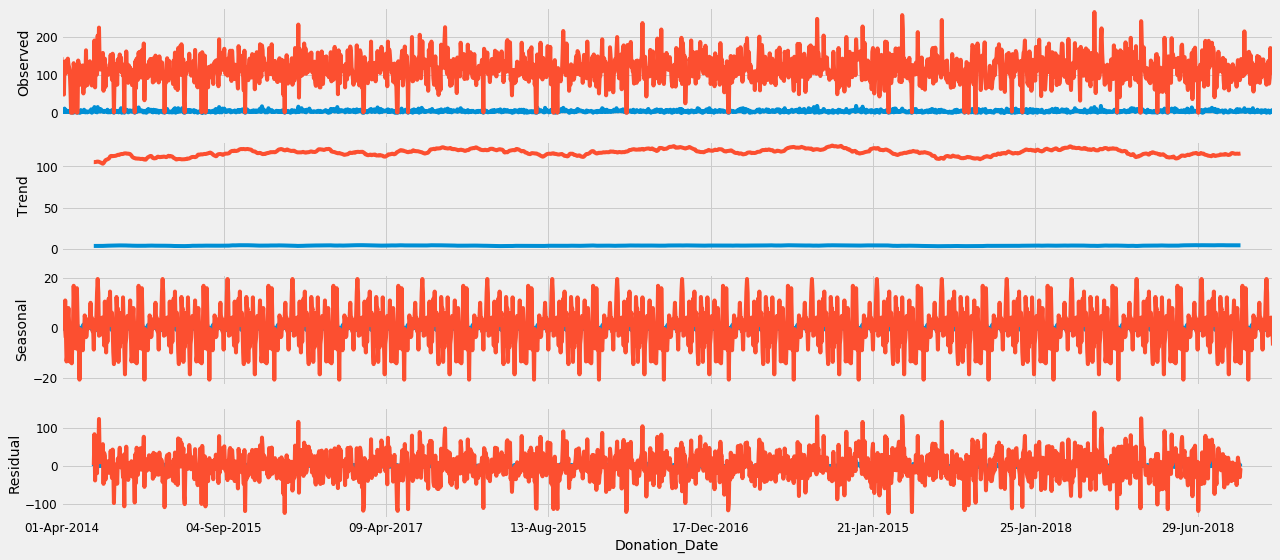

In [239]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
# Observing the trends and a start point to timeseries analysis
decomposition = sm.tsa.seasonal_decompose(y, model='additive' ,freq=100)
fig = decomposition.plot()
plt.show()

# SARIMAX Implementation

In [240]:
# SARIMAX implementation
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [241]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [242]:
y = y.values.ravel('F')

In [209]:
y = pd.DataFrame(y)

In [210]:
y

,0
0,3
1,4
2,2
3,4
4,2
5,11
6,3
7,6
8,2
9,5


In [243]:
# SARIMAX Predictions
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1020      0.011      9.420      0.000       0.081       0.123
ma.L1         -1.0000      0.120     -8.327      0.000      -1.235      -0.765
ar.S.L12      -0.4576      0.009    -48.515      0.000      -0.476      -0.439
sigma2      1107.6649    133.836      8.276      0.000     845.350    1369.979


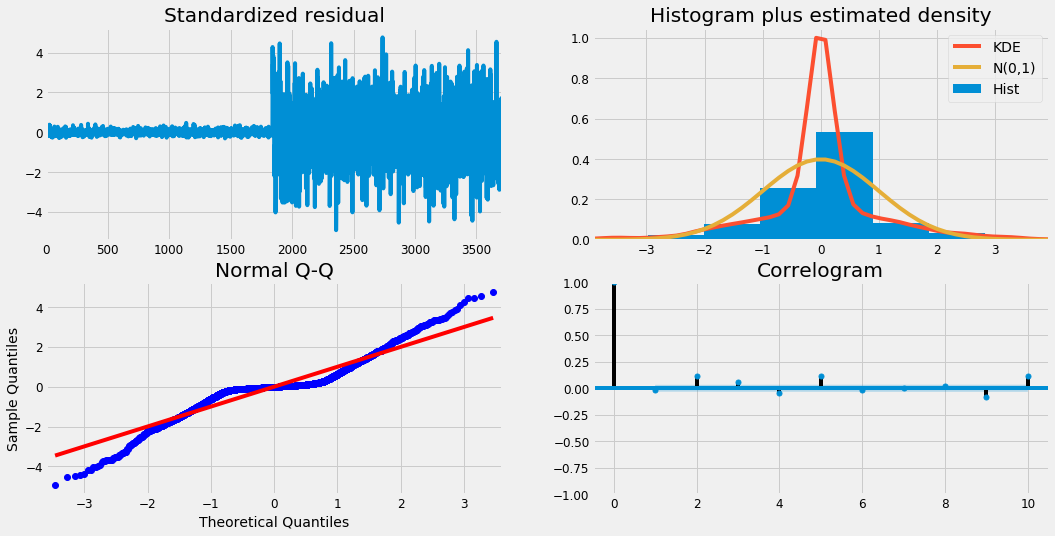

In [245]:
# A bit of indept analysis
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [260]:
pred = results.get_prediction(start= 999, dynamic=False)
pred_ci = pred.conf_int()

ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

TypeError: slice indices must be integers or None or have an __index__ method